# color quantization

Para reducir el tamaño de una imagen podemos elegir los colores más frecuentes y representarlos mediante una etiqueta entera. Los colores típicos se pueden encontrar mediante el algoritmo *K-means*. Para decidir la etiqueta de cada pixel hacemos una búsqueda de vecino más próximo (*nearest neighbour*).

Adaptado del [ejemplo de scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html).

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt
import glob
from matplotlib.pyplot   import imshow, subplot, title, plot
from sklearn.cluster import KMeans
from sklearn.utils import shuffle


def readrgb(file):
    return cv.cvtColor( cv.imread(file), cv.COLOR_BGR2RGB) 

def fig(w,h):
    return plt.figure(figsize=(w,h))

def imshowg(x):
    imshow(x, 'gray')    

In [2]:
def flat(img):
    h,w,d = img.shape
    return np.reshape(img, [w*h, d]).astype(float)/255

def codebook(n, imgs, m=10000):
    pixels = np.vstack([flat(x) for x in imgs])
    sample = shuffle(pixels, random_state=0)[:m]
    code = KMeans(n_clusters=n, random_state=0).fit(sample)
    return code

def encode(code,x):
    h,w,d = x.shape
    return np.reshape(code.predict(flat(x)),[h,w])

def recreate(code,l):
    c = code.cluster_centers_
    return c[l,:]

In [3]:
imgs = [cv.resize(readrgb(f),(0,0), fx=1/4, fy=1/4) for f in glob.glob('../images/naranjas/*.jpg') ]

uint8
float64
1.0


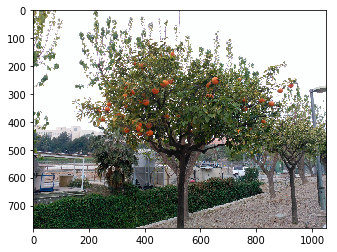

In [4]:
x = imgs[2]

print(x.dtype)
imshow(x);
print(flat(x).dtype)
print(np.max(flat(x)))

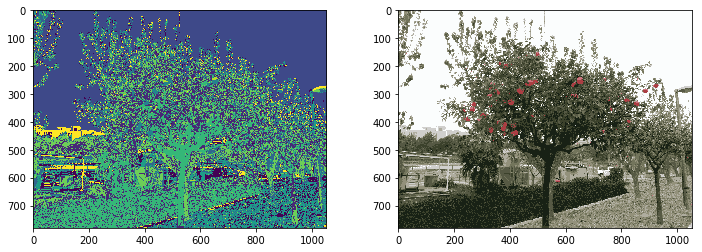

In [5]:
code = codebook(10,imgs)

labs = encode(code,x)

rec  = recreate(code,labs)

fig(12,4)
subplot(1,2,1); imshow(labs)
subplot(1,2,2); imshow(rec);

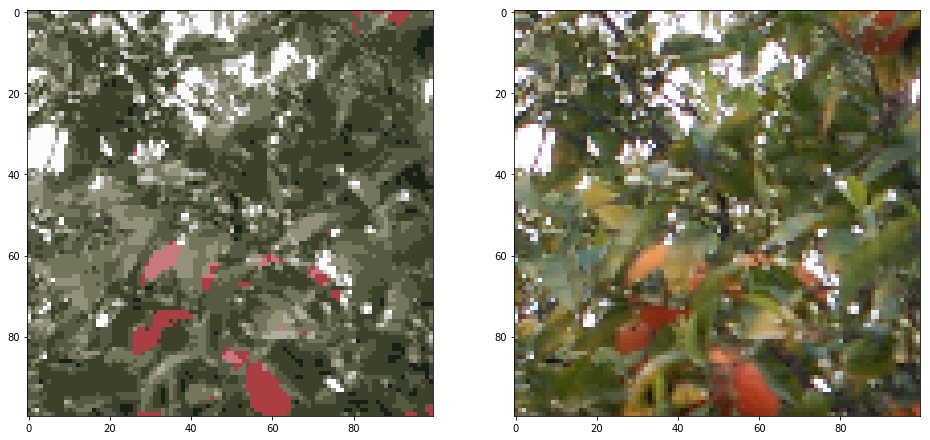

In [6]:
fig(16,8)
subplot(1,2,1); imshow((rec[200:300,300:400])) #*255).astype(np.uint8));
subplot(1,2,2); imshow(  x[200:300,300:400]);

In [7]:
code.cluster_centers_

array([[ 0.68948119,  0.67941073,  0.62405835],
       [ 0.23241705,  0.25635613,  0.17076336],
       [ 0.98755909,  0.99436705,  0.99287481],
       [ 0.45304337,  0.46198825,  0.36369675],
       [ 0.67426881,  0.24522949,  0.26536313],
       [ 0.57815974,  0.57204732,  0.48612014],
       [ 0.09647059,  0.12969355,  0.08592697],
       [ 0.33754818,  0.35047763,  0.26960226],
       [ 0.79076431,  0.47118047,  0.50394558],
       [ 0.81872977,  0.81270231,  0.80495591]])

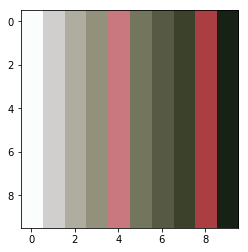

In [8]:
pal = np.outer(np.ones([10]),sorted(code.cluster_centers_,key=lambda c: -c[1])).reshape(10,code.n_clusters,3)
imshow(pal,interpolation='none');

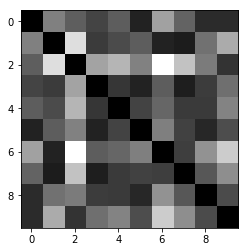

In [9]:
imshow(code.transform(code.cluster_centers_),cmap='gray',interpolation='none');

## k-d tree

El tiempo de cómputo del vecino más próximo se puede reducir precomputando un [k-dtree](https://en.wikipedia.org/wiki/K-d_tree). En este [blog post](http://blog.krum.io/k-d-trees/) se muestran algunos experimentos.

En algunas aplicaciones se utiliza una búsqueda aproximada más rápida del vecino más próximo ([FLANN](https://www.cs.ubc.ca/research/flann/)).